In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
from tb import *

In [3]:
tb = TB(config_file='config_gbv.ini',device_name='CO2')

["CDM4160","CJMCU-811","CJMCU811","Humedad","Temperatura","eco2","etvoc"]


In [9]:
sn = TB(config_file='config_gbv.ini',device_name='SEN')

["co2ppm","lm35","ntc10k","ntc10k_R","tmp36","uptime"]


In [10]:
sen = sn.get_df(key="co2ppm")
sen = sen.resample("60S").pad()
sen.dropna(inplace=True,axis=0)


In [ ]:
cmd = tb.get_df(key="CDM4160")
cmd = cmd.resample("60S").pad()
cmd.dropna(inplace=True,axis=0)

In [12]:
# cjm = tb.get_df(key="CJMCU811")
# cjm = cjm.resample("60S").pad()
# cjm.dropna(inplace=True,axis=0)


In [13]:
datos = pd.concat([cmd,sen],axis=0)
datos

,CDM4160,co2ppm
ts,,
2021-06-09 18:20:00,472.0,NaN
2021-06-09 18:21:00,472.0,NaN
2021-06-09 18:22:00,472.0,NaN
2021-06-09 18:23:00,472.0,NaN
2021-06-09 18:24:00,472.0,NaN
...,...,...
2021-06-10 16:12:00,NaN,5117.24
2021-06-10 16:13:00,NaN,5229.30
2021-06-10 16:14:00,NaN,5324.41


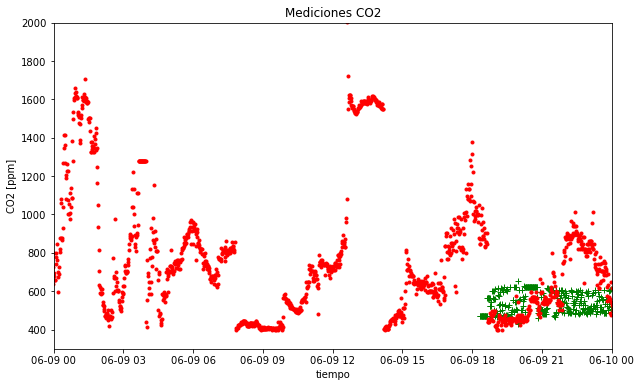

In [101]:
fig, ax = plt.subplots(figsize=(10,6))

fecha1 = parse("2021-06-09") 
fecha2 = fecha1 + pd.Timedelta("1D")

ax.set_xlim(fecha1,fecha2)
ax.set_ylim(300,2000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Mediciones CO2")

ax.plot(datos.CDM4160,'g+')
ax.plot(datos["CJMCU-811"],'r.')


In [106]:
datos.CDM4160

ts
2021-06-09 18:20:00    472.0
2021-06-09 18:21:00    472.0
2021-06-09 18:22:00    472.0
2021-06-09 18:23:00    472.0
2021-06-09 18:24:00    472.0
                       ...  
2021-06-10 10:48:00      NaN
2021-06-10 10:49:00      NaN
2021-06-10 10:50:00      NaN
2021-06-10 10:51:00      NaN
2021-06-10 10:52:00      NaN
Name: CDM4160, Length: 4589, dtype: float64

In [16]:
sen.co2ppm.to_csv("../data/sen.csv")